In [2]:
import pandas as pd
import numpy as np
import time

### Read in Pedestrian Data

In [3]:
peds = pd.DataFrame.from_csv('MTA.pedvolumemodel_data.csv')[['CNN','MODEL6_VOL','UNIVPROX','TOTEMP2']]
peds['lat'] = [float(x.split(' ')[1].replace('(','').strip()) for x in peds.index]
peds['long'] = [float(x.split(' ')[2].replace(')','').strip()) for x in peds.index]
peds = peds.reset_index(drop=True)

In [4]:
peds.head()

,CNN,MODEL6_VOL,UNIVPROX,TOTEMP2,lat,long
0,26956000,98325,0,368,-122.447692,37.791708
1,32981000,181401,0,351,-122.447104,37.746861
2,25382000,296046,0,2685,-122.408159,37.803438
3,22046000,95835,0,495,-122.438179,37.747837
4,26738000,548422,0,1107,-122.432877,37.800778


In [5]:
print ('Number of rows in pedestrian data {0}'.format(len(peds)))

Number of rows in pedestrian data 8135


### Read in Bike Data

In [60]:
bikes = pd.DataFrame.from_csv('MTA.bikevolume_manual_data.csv')
bikes = bikes[bikes['YR2011_PM'] > 0]
print ('Number of rows in bike data {0}'.format(len(bikes)))

Number of rows in bike data 39


In [61]:
bikes = bikes[['CNN', 'YR2011_PM']]

lat = []
lon = []
for point in bikes.index:
    try:
        lat.append(float(point.split()[1].replace('(','')))
        lon.append(float(point.split()[2].replace(')','')))
    except:
        lat.append(None)
        lon.append(None)

bikes['lat'] = lat
bikes['long'] = lon
bikes = bikes.reset_index(drop=True)
bikes.dropna(inplace=True)
bikes['CNN'] = [int(loc) for loc in bikes['CNN']]

In [62]:
bikes.head()

,CNN,YR2011_PM,lat,long
0,27152000,68,-122.464326,37.766077
1,24353000,578,-122.415575,37.773105
2,21326000,117,-122.422854,37.741032
3,23149000,61,-122.475116,37.734630
4,30739000,1134,-122.408080,37.783996


In [63]:
print ('Number of rows in bike data {0}'.format(len(bikes)))

Number of rows in bike data 39


### Read in Tree Data

In [64]:
trees = pd.DataFrame.from_csv('tree_export.csv')
print ('Number of rows in tree data {0}'.format(len(trees)))

Number of rows in tree data 164630


### Consider the planting date? Many missing values, only 63 recorded planting dates

In [65]:
trees['Point X'] = trees.index # drop index
trees = trees.reset_index(drop=True)

In [66]:
trees.columns

Index([u'Point Y', u'Street Address', u'City', u'Postal Code',
       u'Planting Site Width', u'Planting Site Length', u'Planting Site Id',
       u'Custom Id', u'Updated At', u'Updated By', u'Tree Id', u'Tree Present',
       u'Genus', u'Species', u'Cultivar', u'Other Part Of Name',
       u'Common Name', u'Diameter', u'Tree Height', u'Date Planted',
       u'Date Removed', u'Tree: Condition', u'Tree: Crown Width',
       u'Tree: Stewardship', u'Planting Site: Powerlines Overhead',
       u'Planting Site: Sidewalk Damage', u'Planting Site: Site Type',
       u'Planting Site: Stewardship', u'Point X'],
      dtype='object')

In [67]:
# subset columns
trees = trees[['Point Y','Point X','Updated At','Date Planted','Tree Id','Planting Site Id','Diameter','Tree Height']]

In [68]:
# change updated at and date planted from string to time struct
trees['Updated At'] = [time.strptime(date[:19], "%Y-%m-%dT%H:%M:%S").tm_year for date in trees['Updated At']]

In [69]:
# get the most recently-updated trees
trees = trees[trees['Updated At'] == 2017]

### Fill in missing diameters and heights with the average value

In [70]:
values = { 'Diameter': np.mean(trees['Diameter']), 'Tree Height': np.mean(trees['Tree Height']) }
trees = trees.fillna(value=values)

In [71]:
trees.head()

,Point Y,Point X,Updated At,Date Planted,Tree Id,Planting Site Id,Diameter,Tree Height
2364,37.760541,-122.404016,2017,NaN,2173164.0,2455633,8.000000,15.979365
3016,37.750111,-122.414888,2017,NaN,NaN,2468141,9.246954,15.979365
4413,37.778697,-122.399321,2017,NaN,2477772.0,2766097,3.000000,15.979365
4414,37.776795,-122.401741,2017,NaN,2477777.0,2766102,3.000000,15.979365
4415,37.777415,-122.436659,2017,NaN,2477816.0,2766141,3.000000,15.979365


In [72]:
print ('Number of rows in tree data {0}'.format(len(trees)))

Number of rows in tree data 92419


In [73]:
print ('Number of unique trees planted {0}'.format(len(np.unique(trees['Tree Id']))))

Number of unique trees planted 92419


In [74]:
print ('Number of unique planting sites {0}'.format(len(np.unique(trees['Planting Site Id']))))

Number of unique planting sites 92419


### Read in Housing Data

In [75]:
housing = pd.DataFrame.from_csv('Map_of_Historic_Secured_Property_Tax_Rolls_Fiscal_Year_2014.csv')

In [76]:
housing = housing.reset_index(drop=True)[['Current Sales Date', 'Location', 'Closed Roll Assessed Land Value']]

In [77]:
housing = housing.dropna()

In [78]:
housing['year'] = [int(x.split('/')[2]) for x in housing['Current Sales Date']]

In [79]:
housing = housing[housing['year'] == 2011]

In [80]:
housing['lat'] = [float(x.split(',')[0].replace('(','').strip()) for x in housing['Location']]
housing['lon'] = [float(x.split(',')[1].replace(')','').strip()) for x in housing['Location']]

In [81]:
housing = housing.drop(['Location', 'Current Sales Date'], axis=1)

In [82]:
housing.head()

,Closed Roll Assessed Land Value,year,lat,lon
0,519843,2011,37.764694,-122.449439
12,542290,2011,37.757556,-122.471760
18,322758,2011,37.771518,-122.432813
31,968276,2011,37.740560,-122.419415
140,406721,2011,37.754075,-122.410774


In [83]:
print ('Number of houses {0}'.format(len(housing)))

Number of houses 7156


### Join Bike and Pedestrian Data

In [84]:
total = pd.merge(peds, bikes, how='inner', on='CNN')

In [85]:
total.head()

,CNN,MODEL6_VOL,UNIVPROX,TOTEMP2,lat_x,long_x,YR2011_PM,lat_y,long_y
0,23592000,5679595,0,792,-122.388319,37.781803,651,-122.388311,37.781807
1,30734000,19545140,0,290,-122.401389,37.789269,816,-122.401389,37.789269
2,24519000,5744315,0,99426,-122.396718,37.785547,241,-122.396718,37.785547
3,21326000,3630715,0,463,-122.422854,37.741032,117,-122.422854,37.741032
4,24570000,4308693,0,61692,-122.397683,37.799239,745,-122.397671,37.799244


In [86]:
print ('Number of rows in combined dataset {0}'.format(len(total)))

Number of rows in combined dataset 38


In [87]:
total['lat'] = (total['lat_x'] + total['lat_y']) / 2

In [88]:
total['long'] = (total['long_x'] + total['long_y']) / 2

In [89]:
total = total.drop(['lat_x', 'lat_y', 'long_x', 'long_y'], axis=1)

In [90]:
total.head()

,CNN,MODEL6_VOL,UNIVPROX,TOTEMP2,YR2011_PM,lat,long
0,23592000,5679595,0,792,651,-122.388315,37.781805
1,30734000,19545140,0,290,816,-122.401389,37.789269
2,24519000,5744315,0,99426,241,-122.396718,37.785547
3,21326000,3630715,0,463,117,-122.422854,37.741032
4,24570000,4308693,0,61692,745,-122.397677,37.799242


In [91]:
trees.head()

,Point Y,Point X,Updated At,Date Planted,Tree Id,Planting Site Id,Diameter,Tree Height
2364,37.760541,-122.404016,2017,NaN,2173164.0,2455633,8.000000,15.979365
3016,37.750111,-122.414888,2017,NaN,NaN,2468141,9.246954,15.979365
4413,37.778697,-122.399321,2017,NaN,2477772.0,2766097,3.000000,15.979365
4414,37.776795,-122.401741,2017,NaN,2477777.0,2766102,3.000000,15.979365
4415,37.777415,-122.436659,2017,NaN,2477816.0,2766141,3.000000,15.979365


In [92]:
housing.head()

,Closed Roll Assessed Land Value,year,lat,lon
0,519843,2011,37.764694,-122.449439
12,542290,2011,37.757556,-122.471760
18,322758,2011,37.771518,-122.432813
31,968276,2011,37.740560,-122.419415
140,406721,2011,37.754075,-122.410774


### Add tree data

In [126]:
from haversine import haversine

In [127]:
from math import radians, sin, cos, sqrt, asin, pow

# returns distance between two coordinates in meters
def haversine2(lat1, lon1, lat2, lon2):
    R = 6.3781 * pow(10, 6) # Earth radius in meters
    # 6372.8 # Earth radius in kilometers

    dLat = radians(lat2 - lat1)
    dLon = radians(lon2 - lon1)
    lat1 = radians(lat1)
    lat2 = radians(lat2)

    a = sin(dLat/2)**2 + cos(lat1)*cos(lat2)*sin(dLon/2)**2
    c = 2*asin(sqrt(a))

    return R * c

In [131]:
haversine((-122.404016,37.760541), (-122.418231,37.778473), miles=True)

1.1855994978757873

In [132]:
def find_trees(lat1, lon1, radius):
    num_trees = 0
    height = []
    diameter = []
    
    for row in trees.iterrows():
        dist = haversine( (lat1,lon1), (row[1]['Point X'],row[1]['Point Y']), miles=True)
        if dist <= radius:
            height.append(row[1]['Tree Height'])
            diameter.append(row[1]['Diameter'])
            num_trees += 1
            
    return (num_trees, np.mean(height), np.mean(diameter))

In [137]:
def find_average_house_price(lat1, lon1, radius):
    average_price = [0]
    
    for row in housing.iterrows():
        dist = haversine((lat1,lon1), (row[1]['lat'],row[1]['lon']), miles=True)
        
        #print (dist)
        
        if dist <= radius:
            average_price.append(row[1]['Closed Roll Assessed Land Value'])
            
    return (np.mean(average_price))

In [135]:
print(find_trees(-122.418231,37.778473,0.1))

(94, 15.979365079365083, 7.3563181618353788)


In [136]:
print(find_average_house_price(-122.418231,37.778473,0.1))

6687.27068235
6686.56326807
6687.90018145
6685.93105123
6686.93542077
6684.86100344
6687.71892015
6689.34543924
6689.44775965
6689.12054349
6690.10818218
6685.62262178
6687.40250397
6689.40138775
6684.55786534
6685.34859516
6686.45436349
6685.29228019
6687.95243191
6685.62127507
6686.40241486
6688.74277682
6686.63208702
6686.33555606
6688.57375743
6689.41547293
6685.32272175
6690.38081491
6688.50343815
6685.79801768
6686.51404074
6686.17879493
6686.76976492
6688.68483152
6690.30900167
6684.5054743
6685.54785144
6684.84477376
6687.62930467
6684.37358559
6689.56100051
6687.06021676
6685.99694754
6685.860819
6685.27505149
6687.26668753
6687.47839287
6688.42940286
6689.23201427
6688.42141665
6685.41277252
6685.35877263
6684.59113052
6689.92196817
6686.45422364
6687.73669915
6690.39591016
6686.83290206
6683.40640987
6687.68647719
6687.90011461
6684.80297652
6683.79416811
6686.65856638
6683.75953271
6685.56651206
6690.29427537
6689.41484448
6689.2776716
6690.33153817
6683.32042329
6688.02556

In [138]:
def add_tree_data():
    num_trees = []
    heights = []
    diams = []
    house_price = []
    
    for row in total.iterrows():
        lat1 = row[1]['lat']
        lon1 = row[1]['long']
        
        trees, height, diameter = find_trees(lat1,lon1,0.1) # within 100 meteres
        average_price = find_average_house_price(lat1, lon1,10) # within 6 miles
        
        print ('Num trees {0} height {1} diameter {2} housing price {3}'. \
               format(trees, height, diameter, average_price))
        
        num_trees.append(trees)
        heights.append(height)
        diams.append(diameter)
        house_price.append(average_price)
        
    total['num_trees'] = num_trees
    total['average_height'] = heights
    total['average_diameter'] = diams
    total['average_house_price'] = house_price

In [139]:
add_tree_data()

Num trees 145 height 15.9793650794 diameter 13.1379310345 housing price 0.0
Num trees 191 height 15.9793650794 diameter 6.32163863528 housing price 0.0


KeyboardInterrupt: 

In [35]:
total.head()

,CNN,MODEL6_VOL,UNIVPROX,TOTEMP2,YR2011_PM,lat,long
0,24437000,7474130,0,10924,-1,-122.418231,37.778473
1,23338000,1003991,0,448,-1,-122.491356,37.734013
2,23592000,5679595,0,792,651,-122.388315,37.781805
3,24546000,4961388,0,24985,-1,-122.391105,37.792445
4,54151000,2382830,0,30641,0,-122.392951,37.795182


In [36]:
#total.to_csv('combined_tree_data.csv', index=False)

### Visualizations

### TODO: 
### Add tree dimensions x socioeconomic benefits
### Add other data sources (property value, registered business locations, US census bureua data)

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [5]:
import numpy as np

In [6]:
total = pd.DataFrame.from_csv('combined_tree_data.csv')

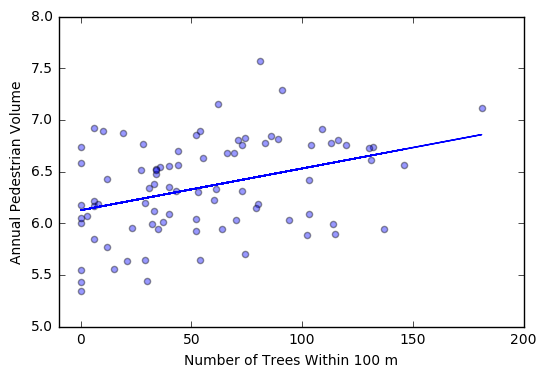

In [8]:
x = total['num_trees']
y = total['MODEL6_VOL']

plt.scatter(x, np.log10(y), alpha=0.4)
plt.xlabel('Number of Trees Within 100 m')
plt.ylabel('Annual Pedestrian Volume')
plt.xlim((-10, 200))

z = np.polyfit(x, np.log10(y), 1)
p = np.poly1d(z)
plt.plot(x, p(x))

plt.gcf().savefig('pedestrians_vs_numtrees.png')
plt.show()

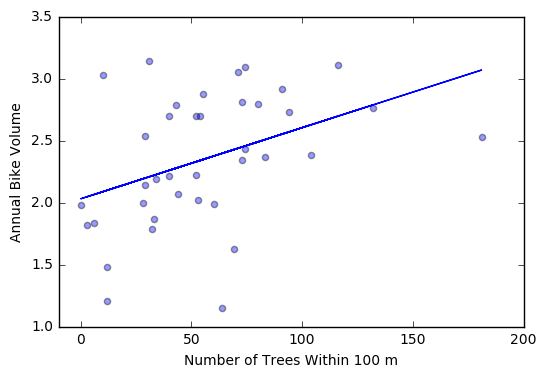

In [75]:
bikes = total[total['YR2011_PM'] > 0]
x = bikes['num_trees']
y = bikes['YR2011_PM']

plt.scatter(x, np.log10(y), alpha=0.4)
plt.xlabel('Number of Trees Within 100 m')
plt.ylabel('Annual Bike Volume')
plt.xlim((-10, 200)) 

z = np.polyfit(x, np.log10(y), 1)
p = np.poly1d(z)
plt.plot(x, p(x))

plt.gcf().savefig('bikers_vs_numtrees.png')
plt.show()

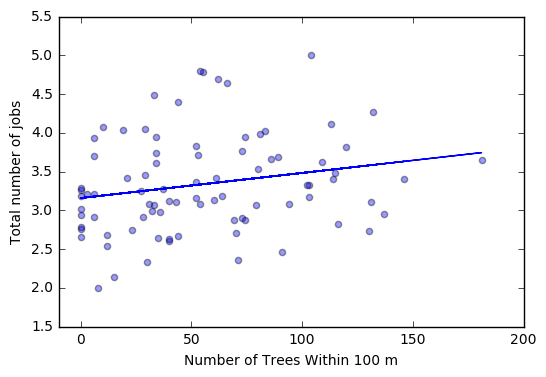

In [76]:
jobs = total[total['TOTEMP2'] > 0]
x = jobs['num_trees']
y = jobs['TOTEMP2']

plt.scatter(x, np.log10(y), alpha=0.4)
plt.xlabel('Number of Trees Within 100 m')
plt.ylabel('Total number of jobs')
plt.xlim((-10, 200)) 

z = np.polyfit(x, np.log10(y), 1)
p = np.poly1d(z)
plt.plot(x, p(x))

plt.gcf().savefig('numjobs_vs_numtrees.png', bbox_inches='tight')
plt.show()